# Mapeo logístico parte 1. Rodrigo Vega Vilchis

En clase analizamos el mapeo logístico $f(x_n)=x_{n+1}=rx_n(1-x_n)$. Calculamos sus puntos fijos y su estabilidad (si son atractores o son repulsores) en términos del parámetro $r$. Así entonces

#### 1. Para algún $r>1+\sqrt{6}$ calcule los puntos fijos de $f^2(x_n)$ (el mapeo aplicado dos veces) y discuta qué es lo que ocurre en estos puntos, en términos de una órbita del sistema.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
from ipywidgets import *

from pylab import *

El código para iterar el mapeo logístico es el siguiente. Escogemos $r=3.5>1+\sqrt{6}$ para esta parte del ejercicioy veamos que ocurre

In [6]:
#Definimos el mapeo logístico
def Logistico(r,x):
    return r*x*(1-x) 

<IPython.core.display.Javascript object>


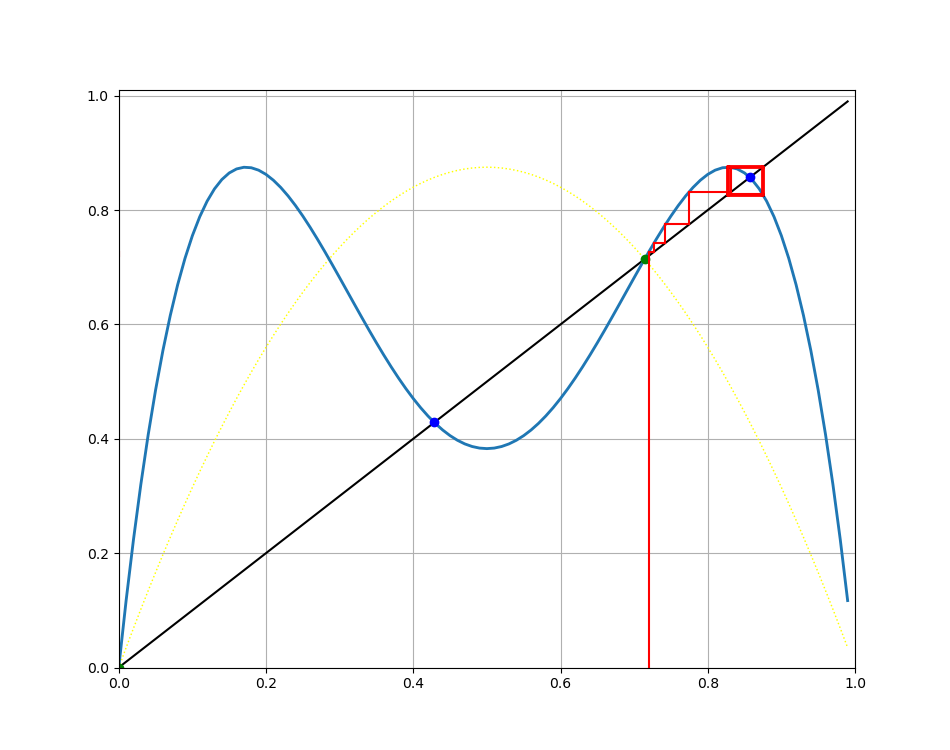

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0, step=0.01), Output()), _dom_classes=('…

In [13]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.set_xlim([0, 1])
ax.set_ylim([0.0, 1.01])
ax.grid(True)


@widgets.interact(x0=(0, 1, 0.01)) 
def update(x0=0.5):
    r = 3.5
    n = 100
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
  
    T=np.linspace(0,1,n,endpoint=False)
    
    plt.plot(T,T, color="black")
    f1 = r*T*(1-T)
    
    plt.plot(T,r*T*(1-T), color="yellow", linestyle=':', linewidth=1.05 ) 
    plt.plot(T,r*f1*(1-f1), linewidth=2.05 ) 
    
    plt.plot(0.,0,'go')   
    
    eqx = float(r-1)/float(r)    
    plt.plot(eqx,Logistico(r,eqx),'go')    
    
    
    Peq= float(r+1+sqrt((r-3)*(r+1)))/float(2*r)    
    plt.plot(Peq,Logistico(r,Logistico(r,Peq)),'bo')
    
    Qeq= float(r+1-sqrt((r-3)*(r+1)))/float(2*r)    
    plt.plot(Qeq,Logistico(r,Logistico(r,Qeq)),'bo')      
    

    x = x0
        
#     if x0 < eqx:
        
#         xV = [0, x0]        
#         yV = [x0, x0]       
#         plt.plot(yV, xV, color='red')   

    if ((x0 > Peq) and (x0 < eqx)):
        
        xV = [0, Logistico(r,x0)]        
        yV = [x0, x0]       
        plt.plot(yV, xV, color='red')   
        
    else:

        xV = [x0,x0]    
        yV = [Logistico(r,Logistico(r,x0)), 0]        
        plt.plot(xV, yV, color='red')   
        
        
#     xV = [x0,x0]    
#     yV = [Logistico(r,Logistico(r,x0)), 0]        
#     plt.plot(xV, yV, color='red')           

    
    
    for i in range(1,n):       
        
        if x == x0:            
#             if x0 < eqx:
            if ((x0 > Peq) and (x0 < eqx)):
                Pi = [x, x]
            else:
                Pi = [0,0] 
        else:           
            Pi = [x, x]                

        a = x

        x = Logistico(r,Logistico(r,x))
#         X.append(x)

        Pf = [a, x] 
        plt.plot(Pi, Pf, color='red')

        b = x

        xV = [a, b]
        yV = [b, b]
        plt.plot(xV, yV, color='red')

        xV = [b, b]
        yV = [b, b]
        plt.plot(xV, yV)   

aquí claramente se puede notar que los puntos azules corresponden a dos atractores mientras que el punto verde corresponde a un punto silla, sin embargo su comportamiento es más el de un repulsor hacia los atractores (azules); la transición ocurre desde 0.72 a 0.73 que es cuando se cambia de órbita. En el caso de los atractores, tienen esa naturaleza porque sus pendientes tangentes son mayores a 1 en valor absoluto.

#### 2. Para algún $r>1+\sqrt{8}$ realice una gráfica de $f^2(x_n)$ y $f^3(x_n)$ donde se muestre la correspondencia de los puntos fijos para las órbitas de periodo 2 y 4.

Escogemos $r=3.85>1+\sqrt{8}$ para las gráficas de este ejercicio.

<IPython.core.display.Javascript object>


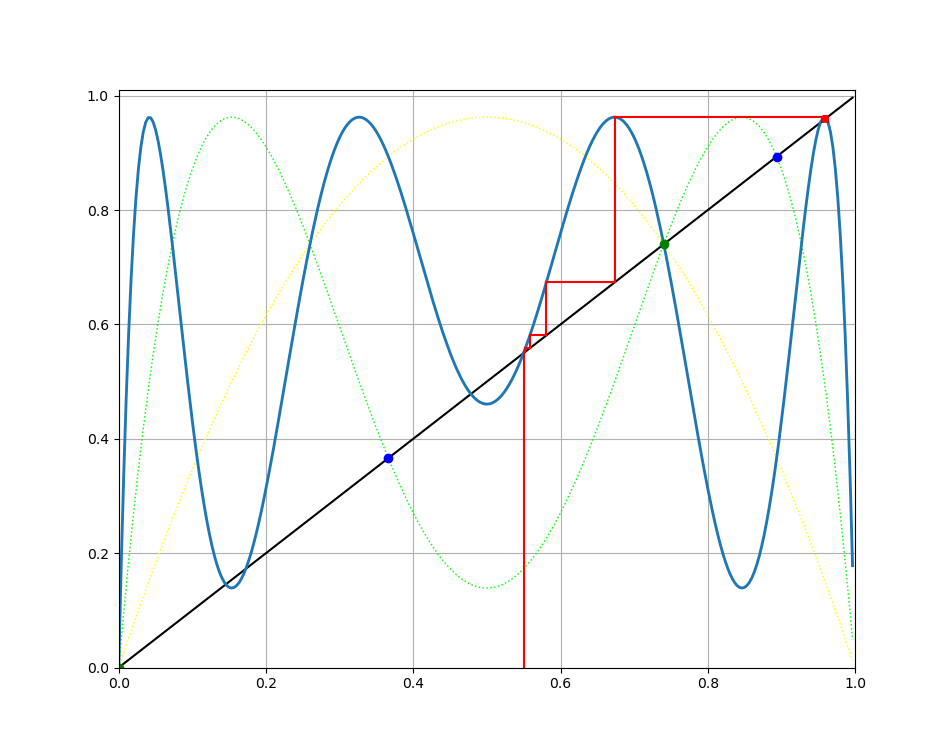

interactive(children=(FloatSlider(value=0.1, description='x0', max=1.0, step=0.01), Output()), _dom_classes=('…

In [20]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.set_xlim([0, 1])
ax.set_ylim([0.0, 1.01])
ax.grid(True)


@widgets.interact(x0=(0, 1, 0.01))

def update(x0=0.1):
    r = 3.85
    n = 300
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
  
    T=np.linspace(0,1,n,endpoint=False)
    
    plt.plot(T,T, color="black")
    f1 = r*T*(1-T)
    f2 = r*f1*(1-f1)
    
    
    plt.plot(T,r*T*(1-T), color="yellow", linestyle=':', linewidth=1.05 ) 
    plt.plot(T,r*f1*(1-f1), color="lime", linestyle=':',  linewidth=1.05 )     
    plt.plot(T,r*f2*(1-f2) , linewidth=2.05 ) 
    
    plt.plot(0.0,0.0,'go')   
    
    eqx = float(r-1)/float(r)    
    plt.plot(eqx,Logistico(r,eqx),'go')   
    
    Peq= float(r+1+sqrt((r-3)*(r+1)))/float(2*r)    
    plt.plot(Peq,Logistico(r,Logistico(r,Peq)),'bo')
    
    Qeq= float(r+1-sqrt((r-3)*(r+1)))/float(2*r)    
    plt.plot(Qeq,Logistico(r,Logistico(r,Qeq)),'bo')      
    
    
    x = x0
        
    if ((x0 > Peq) and (x0 < eqx)):
        
        xV = [0, Logistico(r,Logistico(r,x0))]        
        yV = [Logistico(r,Logistico(r,Logistico(r,x0))), 0]
        plt.plot(yV, xV, color='red')   
        
    else:

        xV = [x0,x0]    
        yV = [Logistico(r,Logistico(r,Logistico(r,x0))), 0]        
        plt.plot(xV, yV, color='red')   
 
    
    
    for i in range(1,n):       
        
        if x == x0:            
            if ((x0 > Peq) and (x0 < eqx)):
                Pi = [x, x]
            else:
                Pi = [0,0] 
        else:           
            Pi = [x, x]                

        a = x

        x = Logistico(r,Logistico(r,Logistico(r,x)))
#         X.append(x)

        Pf = [a, x] 
        plt.plot(Pi, Pf, color='red')

        b = x

        xV = [a, b]
        yV = [b, b]
        plt.plot(xV, yV, color='red')

        xV = [b, b]
        yV = [b, b]
        plt.plot(xV, yV)   

Aplicamos el mapeo logístico 3 veces y lo dejamos en verde al $f^2(x_n)$ y en amarillo a $f(x_n)$. También se logra ver la correspondencia de los puntos fijos para las órbitas de periodo 2 y 4. Al ir cambiando la condición inicial también se pueden ir apreciando atractores y repulsores de $f^3(x_n)$.

# Ejercicio 5. Discuta sobre la cuantificación del Caos en sistemas dinámicos.

#### 1. Discuta brevemente qué significa y qué cuantifica el exponente de Liapunov

A grandes rasgos en ver cuánto se separan dos soluciones con base en las condiciones iniciales. Entre más grande, las soluciones se separan más.

Si el exponente es cero, la distancia entre soluciones se va a mantener constante, si es positivo las soluciones se van a alejar y si es negativo el exponente eventualmente las soluciones van a converger en algún punto.



#### 4. Discuta muy brevemente qué es y qué mide la constante de Fiegenbaum.

Según lo que encontre son cocientes que aparecene en los diagramas de bifurcación. De acuerdo a los diagramas de bifurcación generados por el mapeo logístico. O por funciones del estilo

$$
x_{n+1}=\lambda f(x_{n})
$$

donde $f$ es una función real definida positiva sobre el intervalo $[0,1]$ y con un único valor sobre este intervalo.

Existe una familia de valores $\lambda_i\in\{\lambda_1,\lambda_2,...\}$ de modo que para algún $\lambda_i<\lambda_1$, la sucesión $\{x_n\}$ posee un único límite; si $\lambda_1<\lambda_i<\lambda_2$, la sucesión oscila entre dos valores; si $\lambda_2<\lambda_i<\lambda_3$, la sucesión oscila entre cuatro valores etc.

Estas lambdas que separan dos intervalos se llaman valores de las bifurcaciones. La primera constante de Feigenbaum se define como el límite de la relación entre dos distancias sucesivas entre las ramas más cercanas de $x_n$ (en el máximo de la función)

$$
\delta=\lim_{n\to\infty}\frac{\lambda_{n+1}-\lambda_n}{\lambda_{n+2}-\lambda_{n+1}}
$$

Su valor aproximado es de $\alpha=4.6692$. La segunda constante de Feigenbaum es el límite entre la relación entre dos distancias sucesivas entre las ramas más cercanas de $x_n$ (el máximo de la función $f$)

$$
\alpha=\lim_{n\to\infty}\frac{d_n}{d_{n+1}}
$$

y su valor aproximado es de $2.5029$

**NOTA: No me dio tiempo de revisar el ejercicio 4 debido a que tenía otras tareas que se me atravesaron y las gráficas de los primeros dos ejercicios junto con renderización de la animación me costaron bastantito tiempo. Pero ya estaré realizando la tarea restante posteriormente.**